# Part 2 Foundations of Neural Networks

The notebook comprises some example codes that have been used to compile the slides for lecture 2.

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import statsmodels.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn import preprocessing

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

## Chapter Introduction

### Common activation function used in neural networks
#### The sigmoid function

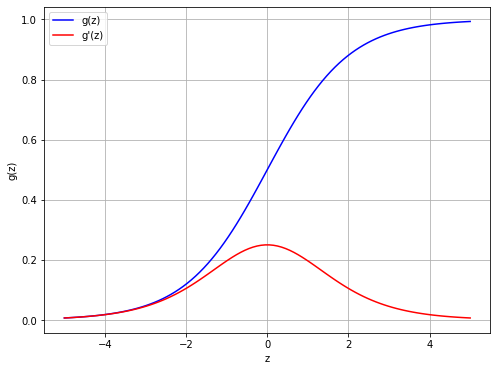

In [3]:
n=100
z=np.linspace(start=-5, stop=5, num=n)
g=1/(1+np.exp(-z))
d = g*(1-g)
plt.plot(z, g, 'b-', label="g(z)")
plt.plot(z, d, 'r-', label="g'(z)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

#### The hyperbolic tangent

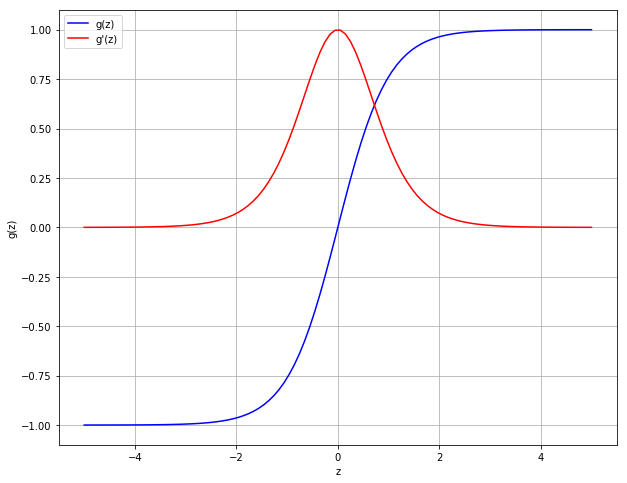

In [35]:
n=100
z=np.linspace(start=-5, stop=5, num=n)
g=(np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))
d = 1-g**2
plt.plot(z, g, 'b-', label="g(z)")
plt.plot(z, d, 'r-', label="g'(z)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()

#### The rectified linear unit (RELU)

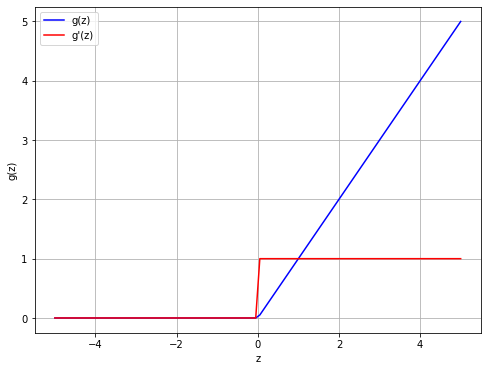

In [2]:
n=100
z=np.linspace(start=-5, stop=5, num=n)
g=np.maximum(0, z)
d=(g>0).astype(int)
plt.plot(z, g, 'b-', label="g(z)")
plt.plot(z, d, 'r-', label="g'(z)")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.show()


Finally, let's do a plot of all the derivatives in a single picutre. This plots reminds us that normalizing input is important to avoid *neuron saturation*.

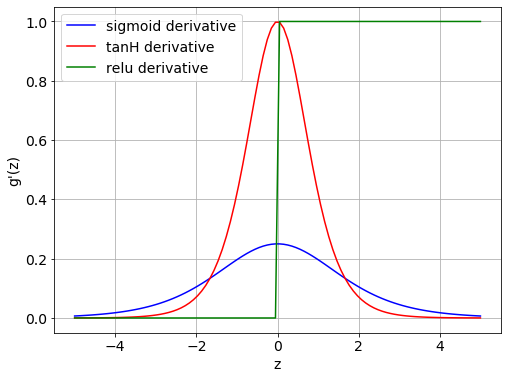

In [3]:
n=100
z=np.linspace(start=-5, stop=5, num=n)
g=1/(1+np.exp(-z))
sig = g*(1-g)
g=(np.exp(z)-np.exp(-z)) / (np.exp(z)+np.exp(-z))
tanH = 1-g**2
g=np.maximum(0, z)
relu=(g>0).astype(int)

matplotlib.rcParams.update({'font.size': 14})

plt.plot(z, sig, 'b-', label="sigmoid derivative")
plt.plot(z, tanH, 'r-', label="tanH derivative")
plt.plot(z, relu, 'g-', label="relu derivative")
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g\'(z)')
plt.show()

### Linear classification of two Gaussians
Illustrate linear classification by means of a perceptron.

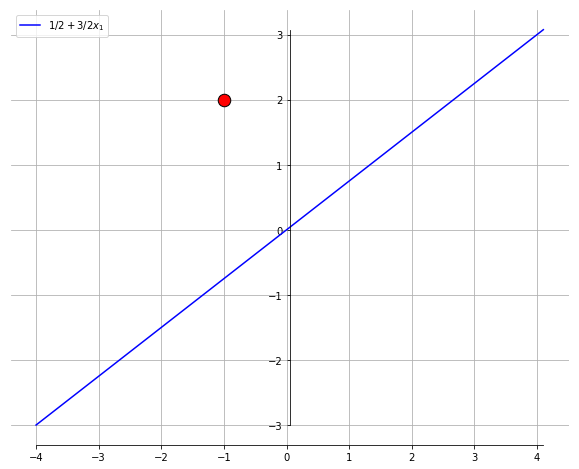

In [47]:
x1 = np.linspace(-4,4.100)
x2 = 0.5 * 3/2*x1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1, x2, 'b-', label="$1/2+3/2x_1$")
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('bottom')
ax.spines['top'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.legend(loc='best')
ax.grid(True)
ax.plot(-1, 2, '.', label="new point", markersize=25, markerfacecolor='r', markeredgewidth=1, markeredgecolor='k')
plt.show()


Linear classification of two Gaussians with different means and covariance matrixes using a linear classifier

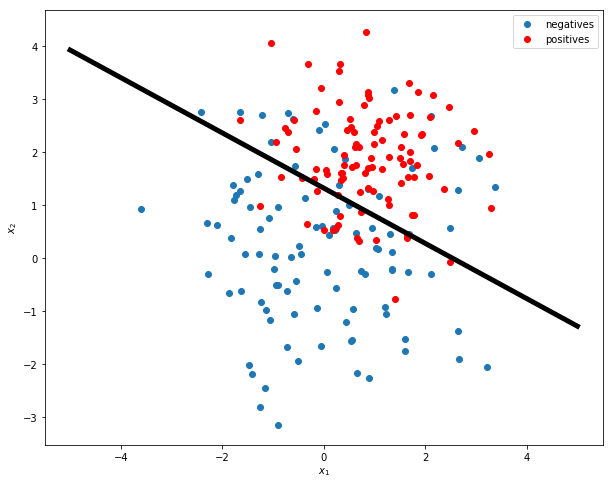

In [11]:
mu_vec1,  mu_vec2 = np.array([0,0]),  np.array([1,2])
cov_mat1, cov_mat2 = np.array([[2,0],[0,2]]), np.array([[1,0],[0,1]])
np.random.seed(0)
x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
x2_samples = np.random.multivariate_normal(mu_vec2, cov_mat2, 100)

# Plot data
fig = plt.figure()
plt.scatter(x1_samples[:,0],x1_samples[:,1], marker='o', label="negatives")
plt.scatter(x2_samples[:,0],x2_samples[:,1], c= 'red', marker='o', label="positives")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(loc="best")

# Estimate linear classifier (logit)
X = np.concatenate((x1_samples,x2_samples), axis = 0)
y = np.array([0]*100 + [1]*100)

clf = linear_model.LogisticRegression(solver="liblinear")
clf.fit(X, y)

# and plot decision boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-', linewidth=5)
plt.show()

## Another example of a linear classifier 

Adapted from from https://github.com/NSAryan12/nn-from-scratch/blob/master/nn-from-scratch.ipynb.

You are invited the above tutorial, which goes through an implementation of neural networks from scratch. Below, we reproduce only the first part of the tutorial with minor adjustments.

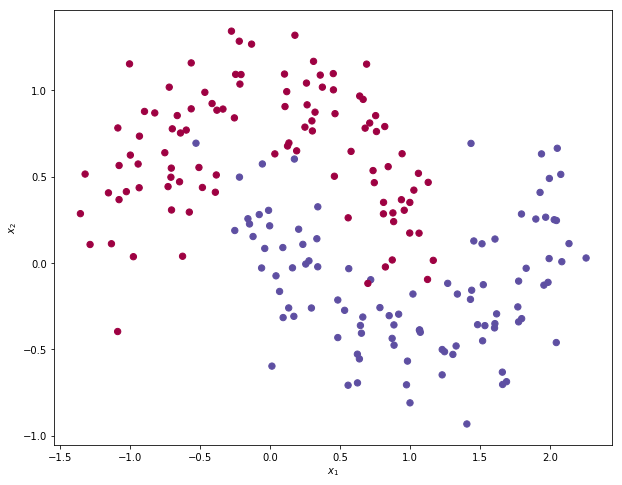

In [9]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

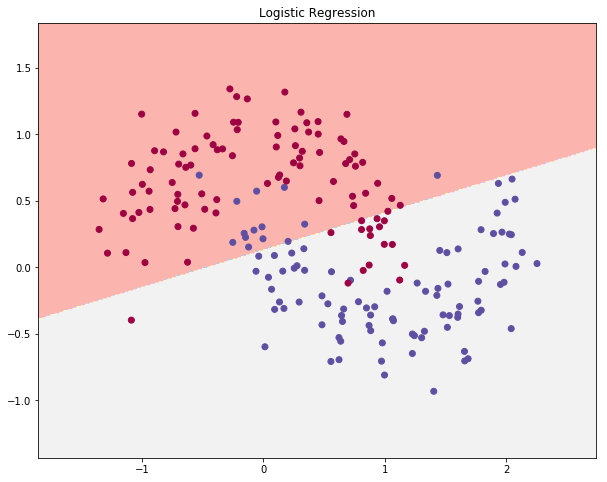

In [51]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    

# Train the logistic regeression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=5)
clf.fit(X, y)

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.show()


## Chapter Neural Networking Demo 

### Calculation of the forward pass through a three-layer neural network

Shape of X is  (7, 2)
Shape of y is  (7,)


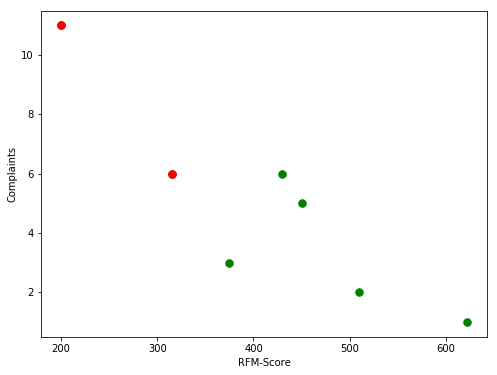

In [51]:
# Input matrix x according to churn example from lecture (slide 2/6)
X = np.asarray([[200, 11], # John
                [450, 5],  # Sara
                [315, 6],  # Mary
                [430, 6],  # Paul
                [622, 1],  # Eve
                [510, 2],  # Mustafa
                [375, 3],  # Cathy
              ])
y = np.array([1,0,1,0,0,0,0])
print('Shape of X is ', np.shape(X))
print('Shape of y is ', np.shape(y))
plt.plot(X[:,0], X[:,1], 'g.', markersize=15,)
plt.plot(X[y==1,0], X[y==1,1], 'r.', markersize=15,)
plt.ylabel('Complaints')
plt.xlabel('RFM-Score')
plt.show()

In [52]:
# Determine the structure of the NN:
i_n = 3 # 3 inputs
h_n = 4 # 4 hidden neurons
o_n = 1 # 1 output neuron, i.e., p(churn|x)

# Randomly define the weights between the layers:
np.random.seed(0) # set seed of random number generation to make results reproducible
w_i_h = np.random.rand(i_n, h_n) # create an array of the given shape and populate it with random values.
w_h_o = np.random.rand(h_n, o_n)

# Determine activation function:
def sigmoid(x):
    # np.exp() calculates the exponential
    # of all elements in the input array.
    return 1 / (1 + np.exp(-x))

# Add constant element to X as intercept
bias = np.ones(np.shape(X)[0])
Xb=np.insert(X, 0, bias, axis=1)

# Input to hidden layer
z = np.dot(Xb,w_i_h)
# Activation function (-> hidden layer output)
z = sigmoid(z)
# Hidden to output layer (including activation)
net_out = sigmoid( np.dot(z, w_h_o) )
print('Network output:')
net_out

Network output:


array([[0.83913506],
       [0.83913506],
       [0.83913506],
       [0.83913506],
       [0.83913506],
       [0.83913506],
       [0.83913506]])

Repeat previous example but normalize data this time

In [62]:
Xbn = preprocessing.normalize(Xb, axis=0)
# Input to hidden layer
z = np.dot(Xbn,w_i_h)
# Activation function
z = sigmoid(z)
# Hidden to output layer (including activation)
net_out = sigmoid( np.dot(z, w_h_o) )
net_out

array([[0.75622948],
       [0.74875574],
       [0.74680096],
       [0.75081122],
       [0.74347928],
       [0.74234961],
       [0.74034874]])

### Solving Nonlinear Prediction Problems Using Neural Networks

#### Approximating the sine function
In this demo, we simply evaluate the sine function for a set of values between $-\pi$ and $\pi$, which will produce the familiar 'wave'-like plot. 

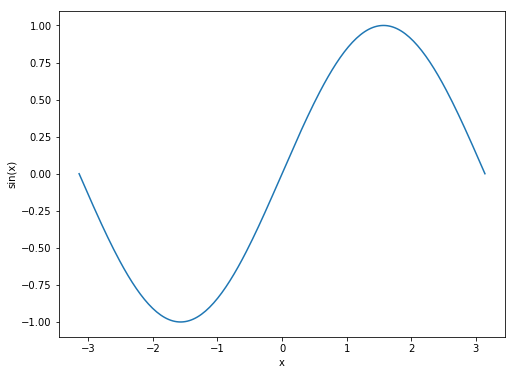

In [63]:
# Plot the sine function for the interval -pi to pi
n=200
x=np.linspace(start=-np.pi, stop=np.pi, num=n)
y=np.sin(x)
x=np.reshape(x, (n,1))

plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()

Clearly, the sine function is nonlinear. Taking a predictive modeling perspective, we could interpret the output of the sine function as a target variable, and then state that the relationship between $x$ and $y=\sin\left(x\right)$ is nonlinear. Given this nonlinearity, we would not expect a linear model to approximate this relationship very accurately. Nonetheless, the us verify the linear forecast.  

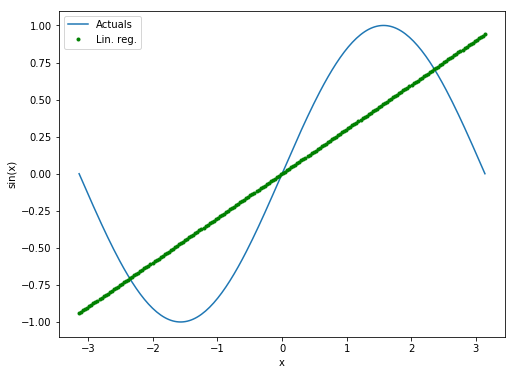

In [64]:
#Estimate a linear regression using the OLS function in the 
#statmodels library
lin_reg = sm.OLS(y, x).fit()
yhat_lin = lin_reg.predict(x)
# Plot the sine function with a linear approximation
plt.plot(x, y, label='Actuals')
plt.plot(x, yhat_lin, 'g.', label='Lin. reg.')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend(loc='best')
plt.show()

As expected, the 'fit' is very poor. Let us no see how a neural network approximates the sine function.

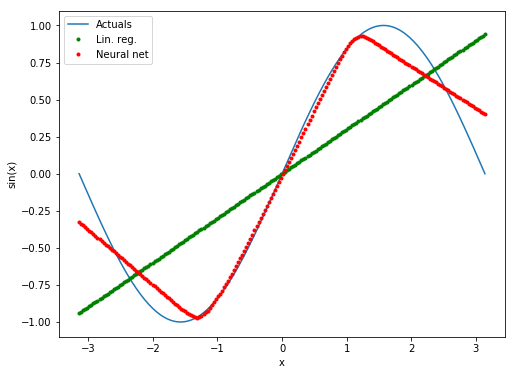

In [65]:
# Estimate feedforward neural network model

# Note that the MLPRegressor function accepts a large number
# of input arguments to specifc the network architecture, 
# the optimization of connection weights (i.e., parameters),
# amongst others. We leave most settings at their default.
# Exceptions are the random seed to initialize connection
# weights, which ensures that we always get the same result
# when calling the function, and the maximum number of 
# iterations for weight optimization aka network training.
# This is because the default setting of 200 would not suffice
# for the data used in this demo and produce some warnings.
nn = MLPRegressor(random_state=123, max_iter=300)
nn.fit(x,y)
yhat_nn = nn.predict(x)

plt.plot(x, y, label='Actuals')
plt.plot(x, yhat_lin, 'g.', label='Lin. reg.')
plt.plot(x, yhat_nn, 'r.', label='Neural net')
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend(loc='best')
plt.show()


Even without tuning any metaparameters, the network has picked up some of the nonlinearity within the data. 

### Approximating a synthetic data set with nonlinearities
Let us move on to another setting, where we first create some synthetic data with a nonlinear relationship between a continuous target y and a continuous independent variable x, then add some random noise to corrupt the relationship, and last fit another linear model and neural network model to the data.

Here is the function to create the synthetic data:

In [66]:
def make_data(N=2000):
    ''' Generate synthetic data with sample size N 
    of two variables, x and y, that are related to each
    other in a nonlinear manner. '''
    
    X = 0.5*np.random.normal(size=N)+0.35
    Xt = 0.75*X-0.35
    X = X.reshape((N,1))

    Y = -(8 * Xt**2 + 0.1*Xt + 0.1) + 0.05 * np.random.normal(size=N)
    Y = np.exp(Y) + 0.05 * np.random.normal(size=N)
    Y /= max(np.abs(Y))
    return X, Y

Let us invoke our customer function and examine the data.

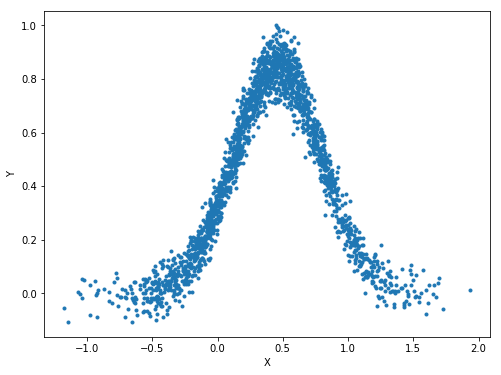

In [67]:
X, y = make_data()
plt.plot(X,y, '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

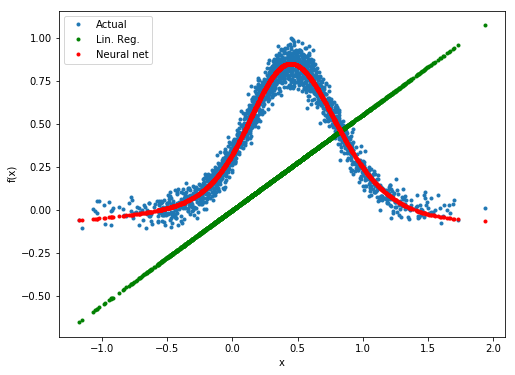

R2 of linear regression: 0.4
R2 of neural network is: 1.0


In [68]:
# First estimate a linear model
lin_reg = sm.OLS(y, X).fit()
# Next estimate a neural network
nn = MLPRegressor(random_state=123, activation='tanh',
                  hidden_layer_sizes=(3),
                  solver='lbfgs', verbose=False)

nn.fit(X,y)
# Then produce predictions
yhat_lin = lin_reg.predict(X) # in-sample fit
yhat_nn  = nn.predict(X) # in-sample fit

plt.plot(X[:,0], y, '.', label="Actual")
plt.plot(X[:,0], yhat_lin, 'g.', label="Lin. Reg.")
plt.plot(X[:,0], yhat_nn,  'r.', label="Neural net")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.legend(loc = "best")
plt.show()
# Print R2 statistics of both models 
print("R2 of linear regression: {:.1f}".format(lin_reg.rsquared_adj))
print("R2 of neural network is: {:.1f}".format(nn.score(X,y)))

To conclude the demo, note that the MLPRegression provides an interesting method called __partial_fit__. While the method __fit__, which we used above, trains the neural network for a maximum number of iteration, partial_fit performs a single iteration of the training. Calling this function multiple times allows you to examine how the neural network - iteratively - learns to recognize structure in the data. 
The following is just a very basic example. A much more powerful demo is available at: https://playground.tensorflow.org/

In [69]:
nn = MLPRegressor(random_state=123)

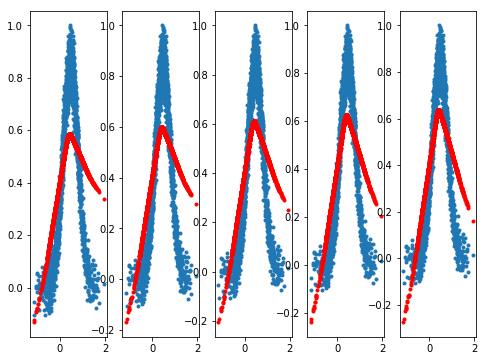

In [72]:
n=5 # number of steps
for i in range(n):
    nn.partial_fit(X,y)
    plt.subplot(1,n,i+1)
    plt.plot(X[:,0], y, '.', label="Actual")
    plt.plot(X[:,0], nn.predict(X), 'r.', label="NN forecast")
    
plt.show()    

## Chapter Quantifying Empirical Loss


### Square-error loss

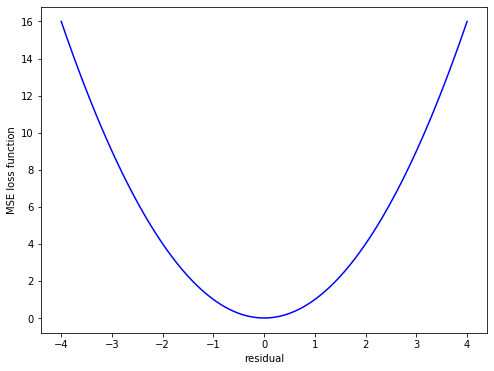

In [4]:
n = 100
e = np.linspace(-4, 4, n) # consider residuals between -4 and 4

mse_loss = np.power(e, 2)
plt.plot(e, mse_loss, 'b-')
plt.xlabel('residual')
plt.ylabel('MSE loss function')
plt.show()

### Cross-entropy loss

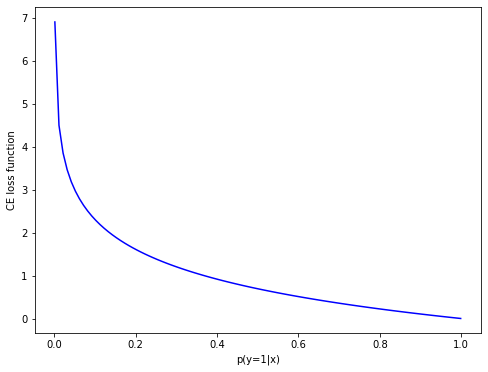

In [5]:
n=100
y=1 # assume y = 1
yHat = np.linspace(0.001, 0.999, n)

def cross_entropy(yHat, y):
    if y == 1:
      return -np.log(yHat)
    else:
      return -np.log(1 - yHat)

ce_loss = np.zeros(np.shape(yHat))
for i in range(0,n):
    ce_loss[i]=cross_entropy(yHat[i],y)

plt.plot(yHat, ce_loss, 'b-')
plt.xlabel('p(y=1|x)')
plt.ylabel('CE loss function')
plt.show()

### Exemply the softmax function

In [57]:
# Example from Wikipedia; implement as lambda function
n=100
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax = lambda z:np.exp(z)/np.sum(np.exp(z))
print([round(x, 3) for x in softmax(z)])
print('Total sum: ', np.sum(softmax(z)))

[0.024, 0.064, 0.175, 0.475, 0.024, 0.064, 0.175]
Total sum:  0.9999999999999999


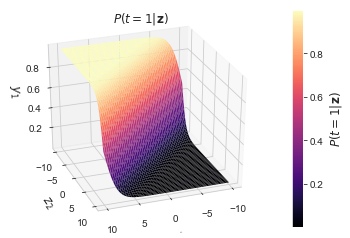

In [59]:
# Example from: https://peterroelants.github.io/posts/cross-entropy-softmax/

import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib.colors import colorConverter, ListedColormap
from mpl_toolkits.mplot3d import Axes3D  # 3D plots
from matplotlib import cm # Colormaps
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
#

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

# Plot the softmax output for 2 dimensions for both classes
# Plot the output in function of the weights
# Define a vector of weights for which we want to plot the ooutput
nb_of_zs = 200
zs = np.linspace(-10, 10, num=nb_of_zs) # input 
zs_1, zs_2 = np.meshgrid(zs, zs) # generate grid
y = np.zeros((nb_of_zs, nb_of_zs, 2)) # initialize output
# Fill the output matrix for each combination of input z's
for i in range(nb_of_zs):
    for j in range(nb_of_zs):
        y[i,j,:] = softmax(np.asarray([zs_1[i,j], zs_2[i,j]]))
# Plot the loss function surfaces for both classes
with sns.axes_style("whitegrid"):
    fig = plt.figure(figsize=(6,4))
    # Plot the loss function surface for t=1
    ax = fig.gca(projection='3d')
surf = ax.plot_surface(
    zs_1, zs_2, y[:,:,0], linewidth=0, cmap=cm.magma)
ax.view_init(elev=30, azim=70)
cbar = fig.colorbar(surf)
ax.set_xlabel('$z_1$', fontsize=2)
ax.set_ylabel('$z_2$', fontsize=12)
ax.set_zlabel('$y_1$', fontsize=12)
ax.set_title ('$P(t=1|\mathbf{z})$')
cbar.ax.set_ylabel('$P(t=1|\mathbf{z})$', fontsize=12)
plt.show()